<a href="https://colab.research.google.com/github/Alisia-Phini/CognoRise-InfoTech/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR PRICE PREDICTION

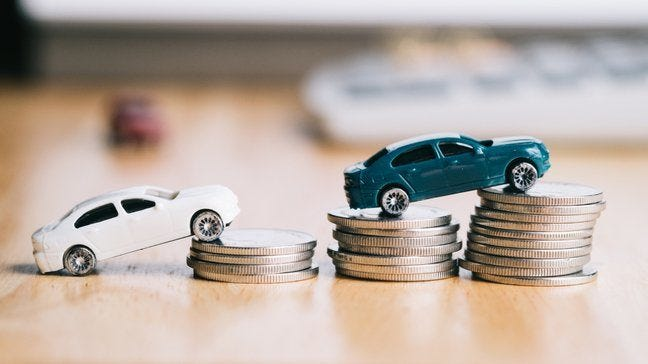

Numerous factors contribute to a car's price, encompassing brand reputation,
car features, horsepower, mileage efficiency, and more.
Car price prediction stands as a significant domain within machine learning
research.
If you seek to master the art of training a car price prediction model, this
project presents a valuable learning opportunity

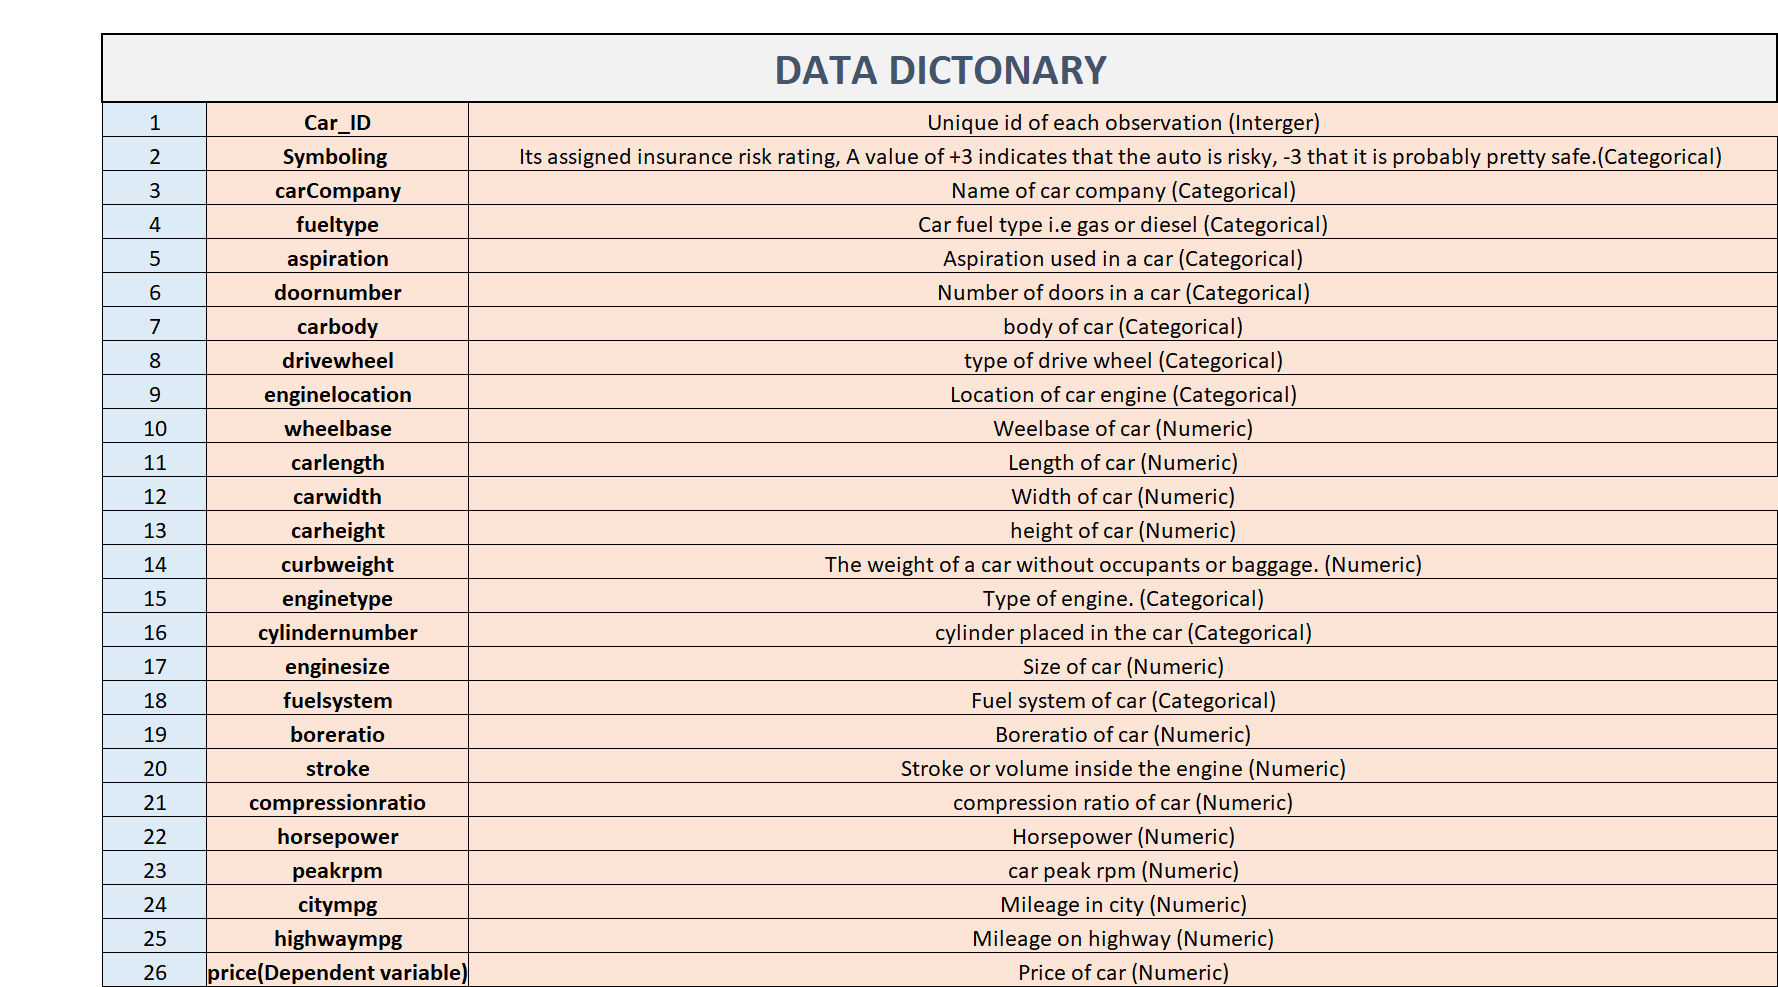

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


The datset has 205 rows and 26 columns.Each features contributes to the prediction.

In [195]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [196]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [198]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [199]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [200]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [201]:
df.shape

(205, 26)

In [202]:
df.drop(['car_ID'],axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [203]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [204]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [205]:
df['doornumber']=df['doornumber'].replace({'four':4,'two':2})

In [206]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [207]:
df['enginelocation']=df['enginelocation'].replace({'front':1,'rear':0})

(array([ 3.,  0., 22.,  0., 67.,  0., 54.,  0., 32., 27.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <BarContainer object of 10 artists>)

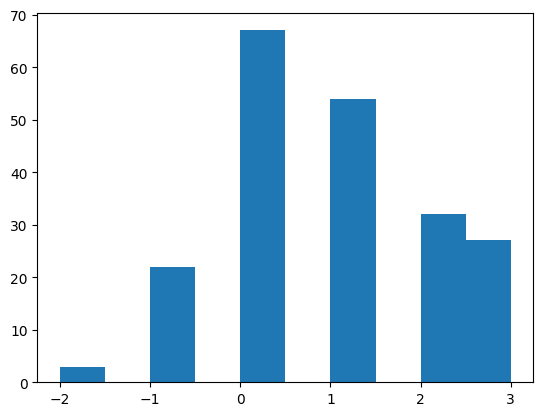

In [208]:
plt.hist(df['symboling'])

<Axes: xlabel='fueltype', ylabel='Count'>

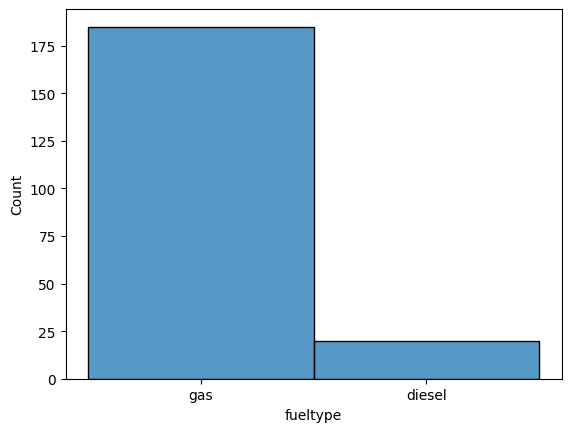

In [209]:
sns.histplot(df['fueltype'])

<Axes: xlabel='aspiration', ylabel='Count'>

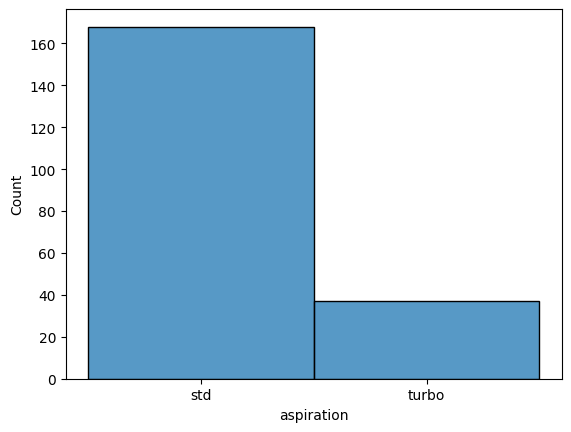

In [210]:
sns.histplot(df['aspiration'])

<Axes: xlabel='CarName', ylabel='price'>

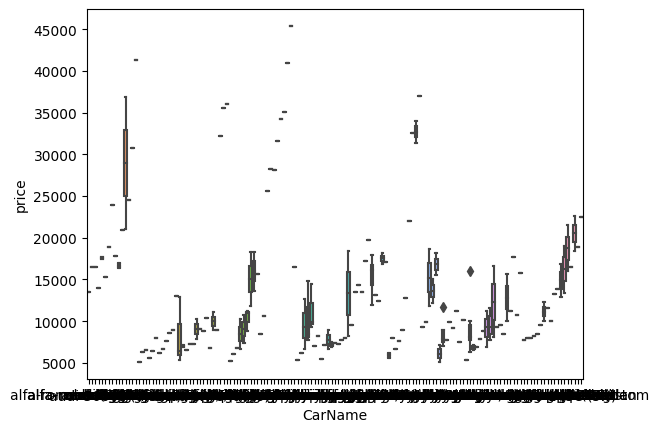

In [211]:
sns.boxplot(x='CarName',y='price',data=df)

<ipython-input-212-b7d80134de85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['enginesize'])


<Axes: xlabel='enginesize', ylabel='Density'>

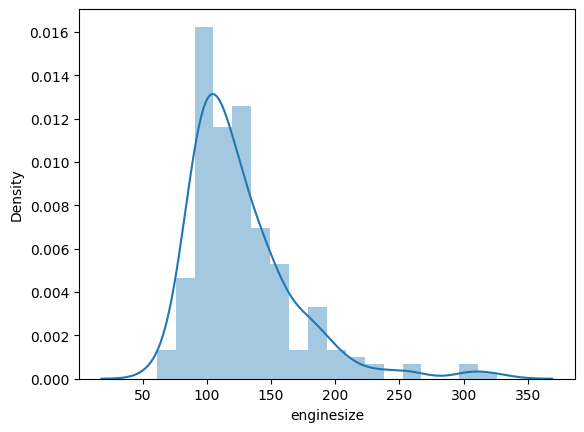

In [212]:
sns.distplot(df['enginesize'])

<Axes: xlabel='boreratio', ylabel='Density'>

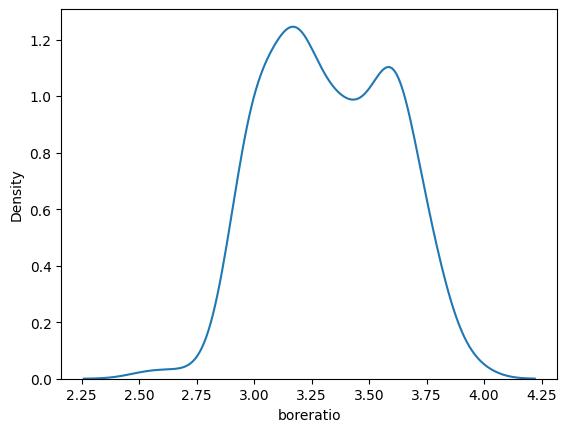

In [213]:
sns.kdeplot(df['boreratio'])

<Axes: xlabel='carbody', ylabel='count'>

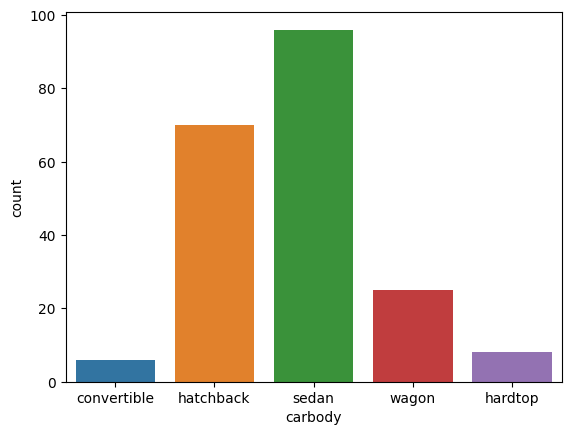

In [214]:
sns.countplot(x='carbody',data=df)

<Axes: xlabel='stroke', ylabel='count'>

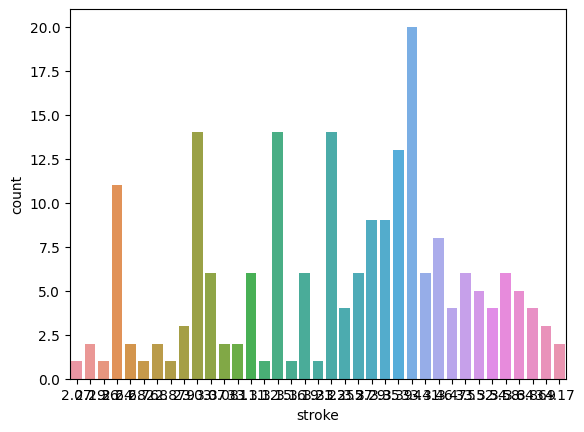

In [215]:
sns.countplot(x='stroke',data=df)

<Axes: xlabel='carlength', ylabel='count'>

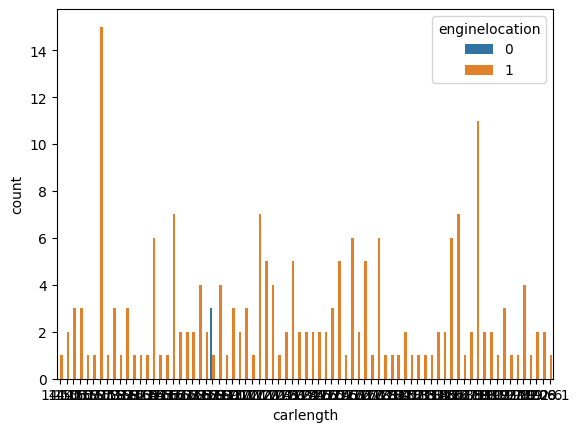

In [216]:
sns.countplot(x='carlength',hue='enginelocation',data=df)

<Axes: xlabel='drivewheel', ylabel='count'>

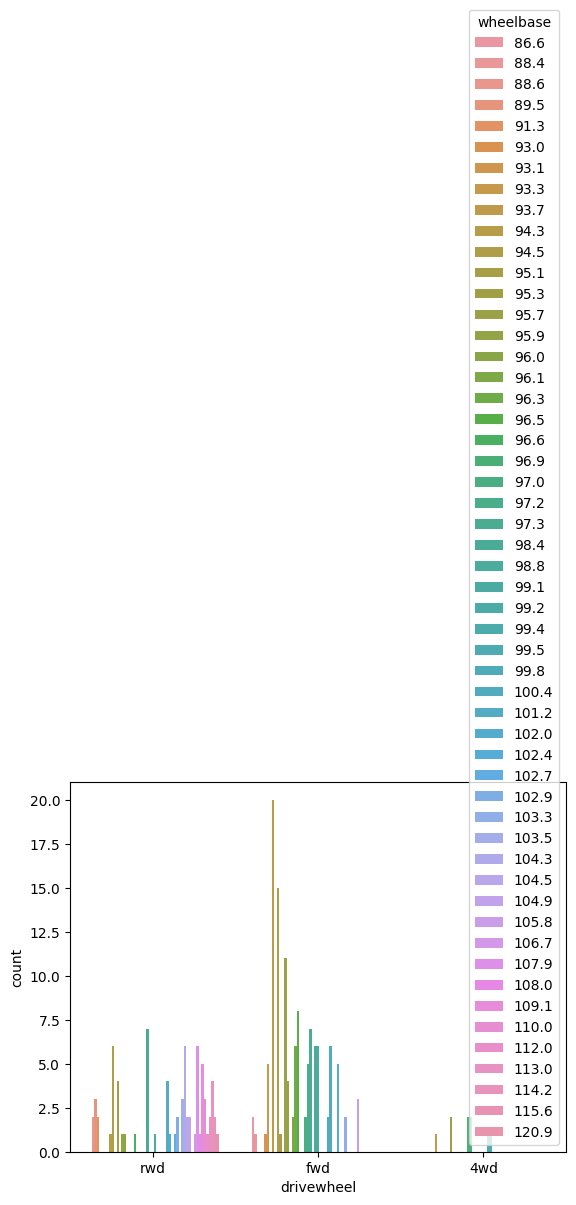

In [217]:
sns.countplot(x='drivewheel',hue='wheelbase',data=df)

In [218]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['CarName']=encoder.fit_transform(df['CarName'])
df['fueltype']=encoder.fit_transform(df['fueltype'])
df['aspiration']=encoder.fit_transform(df['aspiration'])
df['carbody']=encoder.fit_transform(df['carbody'])
df['drivewheel']=encoder.fit_transform(df['drivewheel'])
df['enginetype']=encoder.fit_transform(df['enginetype'])
df['cylindernumber']=encoder.fit_transform(df['cylindernumber'])
df['fuelsystem']=encoder.fit_transform(df['fuelsystem'])


In [219]:
df.dtypes

symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [220]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,2,0,2,1,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,2,0,2,1,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,2,2,2,1,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,4,3,1,1,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,4,3,0,1,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,4,3,2,1,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,4,3,2,1,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,4,3,2,1,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,4,3,2,1,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


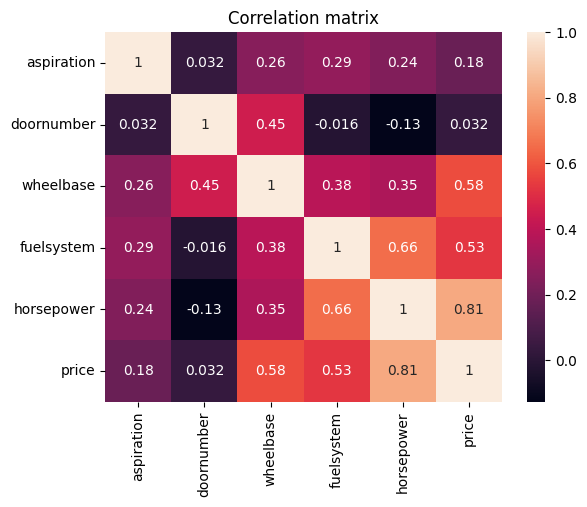

In [230]:
data=['aspiration','doornumber','wheelbase','fuelsystem','horsepower','price']
corr_matrix=df[data].corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [223]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [225]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([26145.42565725, 18797.92554793, 10245.74005173, 14077.26094103,
       27384.38928363,  6974.52313406,  8450.22366789,  6419.8773874 ,
        9835.77752924,  6665.16226552, 14493.82371312,  6654.36969882,
       17230.53779219, 11425.10779201, 41227.04046448,  7455.48696465,
         807.86127487, 15866.67483661, 10390.79753397, 10959.69738882,
       11907.15757746, 21537.97484577,  8874.7533512 ,  4546.85316565,
        8508.68252051, 24851.65813327, 14897.85444962, 16303.54811782,
        5702.31116063, 16780.71072856, 27558.56500925,  8026.33652037,
        4828.15471035, 22846.82901083,  9493.55358141, 28034.96216704,
       11101.7962732 , 10625.68563828,  7684.66762659, 16174.82766696,
        7925.94067033, 14432.3648662 , 19502.34530088,  5339.87855423,
        7398.20349921, 10957.516145  ,  9617.50547705,  7403.54650904,
       19448.683061  , 16466.53833296,  7983.45816501, 19867.20267674,
        4551.08053281, 10060.37509037,  5528.48102499, 15521.0360293 ,
      

In [226]:
df1=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred,'error':y_test-y_pred})
df1

,actual_value,predicted_value,error
0,30760.000,26145.425657,4614.574343
1,17859.167,18797.925548,-938.758548
2,9549.000,10245.740052,-696.740052
3,11850.000,14077.260941,-2227.260941
4,28248.000,27384.389284,863.610716
...,...,...,...
57,11845.000,10598.251691,1246.748309
58,37028.000,34367.298677,2660.701323
59,5389.000,7285.535772,-1896.535772
60,9233.000,9201.851373,31.148627


In [227]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
print(r2_score(y_test,y_pred))

0.8416411789796385


In [228]:
print(mean_absolute_error(y_test,y_pred))

2277.6403798387655


In [229]:
print(mean_absolute_percentage_error(y_test,y_pred))

0.20550434555158234
